In [1]:
#Libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_val_predict



In [2]:
#Loading Data
df = pd.read_csv("winequality-red.csv", sep=';')

### __DATA EXPLORATION__

The initial step in the analysis was to verify the presence of missing or null values within the dataset. These missing values, if not addressed adequately, can have a negative impact on the performance or result in a biased model. After examination, it was determined that there were no missing values in the dataset.

In [3]:
#missing data

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Our table of statistics showed that the variables are spread widely. In machine learning, it is common for variables to have a wide range of values, as shown by the table of statistics. This wide spread can lead to inconsistencies and affect the predictions made by the model. To address this issue, various preprocessing techniques can be applied to transform the variables, such as normalization, scaling, or standardization, to ensure that all the variables are on the same scale and to prevent any one variable from having a disproportionate influence on the model. By transforming the variables, the performance and accuracy of the machine learning models can be improved. We will discuss our apporach in the latter sections.

In [4]:
#overall statistics

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Many statistical techniques, such as linear regressions and t-tests, assume normality in their underlying data distribution. To assess this assumption, histograms were utilized to visualize the distribution of the variables. The results showed that some variables had a skewed distribution.

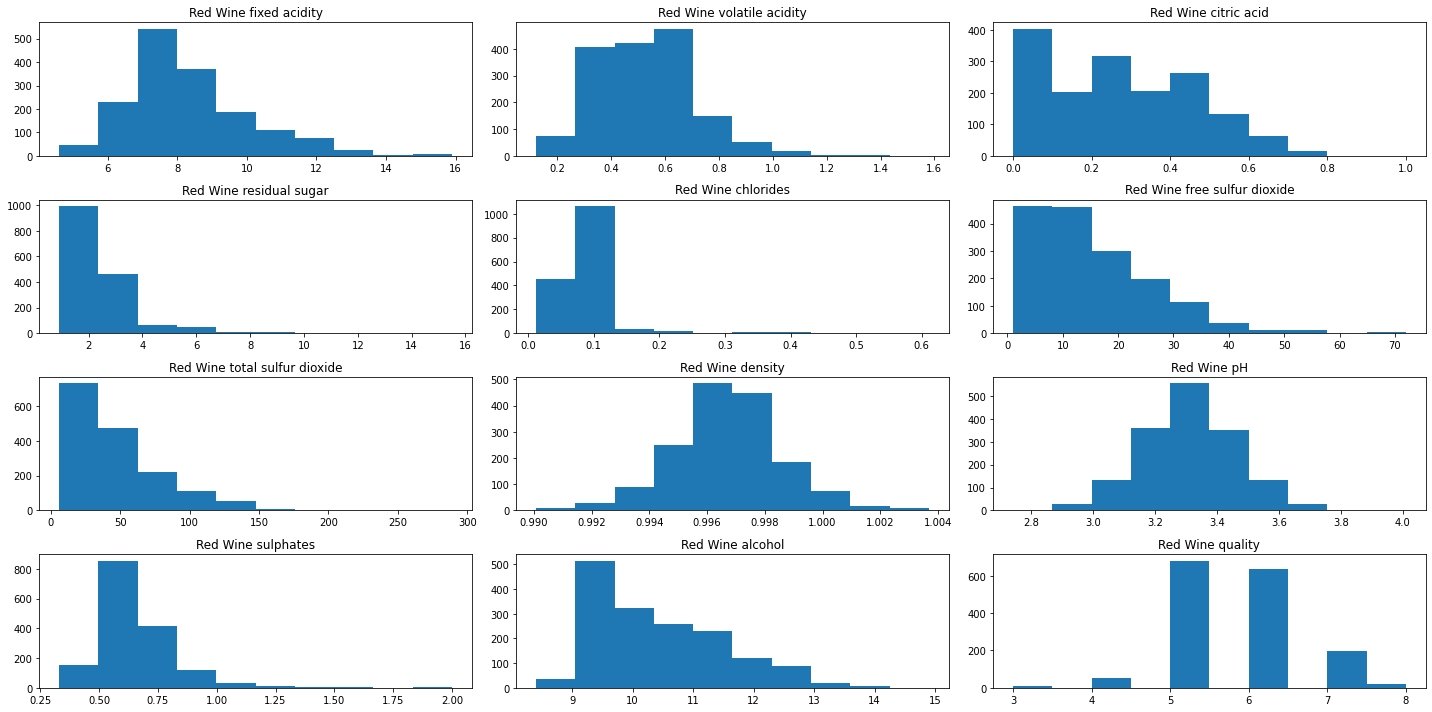

In [5]:
#Red Wine Normality Distribution
fig = plt.figure(figsize = [20,10])
cols = df.columns
count = 1
for col in cols:
    plt.subplot(4,3,count)
    count+=1
    plt.hist(df[col])
    plt.title("Red Wine " + col)
plt.tight_layout()
plt.show()
#do different scaling for each, if it's too skwed we can do log scaling


We then employed the use of boxplots to detect outliers. Outliers are defined as data points that deviate significantly from the main distribution of the data (Point 1). These deviations can either be a result of measurement errors or can reflect the true variation of the data. Outliers can significantly impact the summary statistics and make them unrepresentative of the main distribution of the data. Our analysis of the boxplots revealed the presence of outliers or skewness in all variables except alcohol.

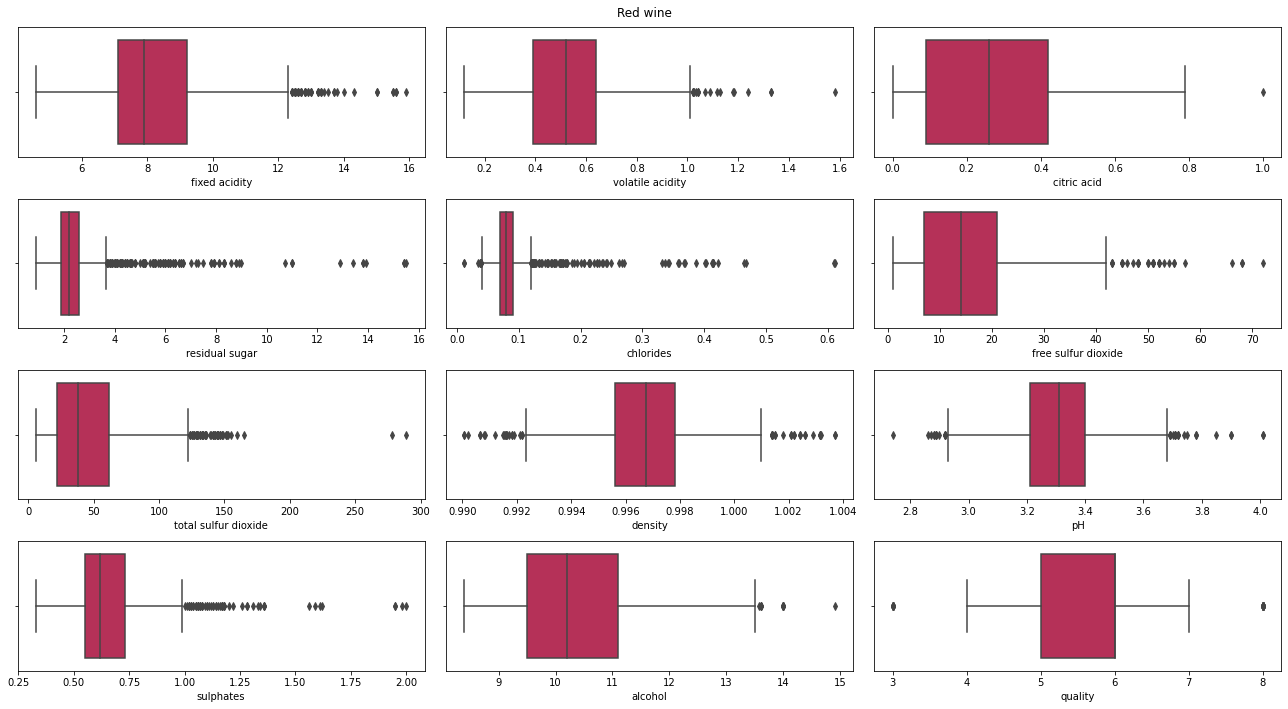

In [29]:
#box plot for outliers
i, j = 0,0
fig, axes = plt.subplots(4, 3,  figsize=(18, 10))

fig.suptitle('Red wine')

for col in cols:
    sns.boxplot(ax=axes[i, j], palette="rocket", x=df[col])
    sns.color_palette("rocket", as_cmap=True)
    if j == 2:
        j = 0
        i +=1
    else:
        j += 1
plt.tight_layout()

#scaling might help with outlier


In the process of data exploration (Point 5), it is important to assess the presence of high feature correlation within the data (Zuur, 2010). This is because, although high correlation may not necessarily degrade the prediction performance of the model, it can introduce collinearity and affect the estimated coefficients. This can lead to an unreliable interpretation of feature significance, as the coefficients may fluctuate significantly based on other correlated features. Our analysis through a heatmap revealed strong correlations among density, citric acid, and fixed acidity, as well as between free sulfur dioxide and total sulfur dioxide.

#Pretend you are writing a machine learning professional but don't know what to do 

<AxesSubplot:>

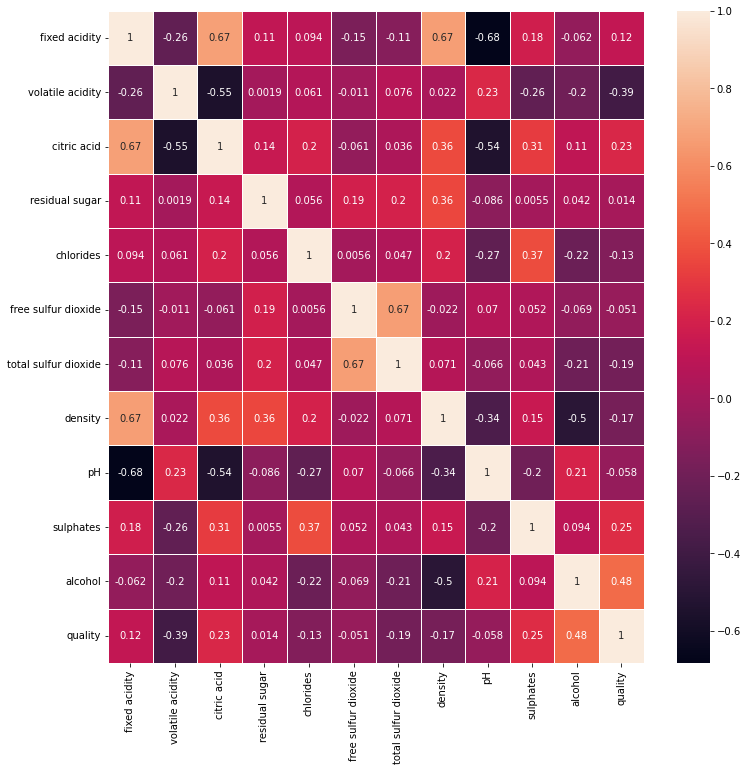

In [7]:
# Heatmap and Correlation 
#glue = sns.load_dataset(df).pivot("Model", "Task", "Score")
fig, ax = plt.subplots(figsize = (12,12))
df1 = pd.DataFrame(df, columns=cols)
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

In [8]:
#getting inputs and target
X = df.values[:, 0:11]
Y = df.values[:, 11]

### Data Pre-processing

In [9]:
#Train-Test, Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)
 

#Z scaling
std_scaler = StandardScaler()
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train))
X_test = pd.DataFrame(std_scaler.fit_transform(X_test))

### Baseline Model

In [36]:
#Baseline Model
m = len(Y_test)
Y_pred =[]
for i in range(m):
    Y_pred.append(np.mean(Y))

print("baseline mse: ", mean_squared_error(Y_test,Y_pred))
print("baseline mape: ", mean_absolute_percentage_error(Y_test,Y_pred))

baseline mse:  0.6558438222704857
baseline mape:  0.12241928549093184


### Ridge Regressor Model

In [10]:
#sklearn Ridge with builtin cross-validation
r_alphas = np.logspace(-5, 2, 100) #grid search
rmodel = RidgeCV(r_alphas).fit(X_train, Y_train)

print("Training data")
Y_pred = rmodel.predict(X_train)
print("r: ", rmodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = rmodel.predict(X_test)
print("r: ", rmodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))
print("Optimal Alpha: ", rmodel.alpha_)



Training data
r:  0.3472819025739061
mse:  0.42465354436970293
mape:  0.09225382719280073

Testing data
r:  0.399917932902743
mse:  0.39215714695391934
mape:  0.08921402663858209
Optimal Alpha:  61.35907273413163


### LASSO Model

In [33]:
# sklearn LASSO WITH CROSS VALIDATION
lmodel = LassoCV(cv=10, random_state=0).fit(X_train, Y_train)

print("Training data")
Y_pred = lmodel.predict(X_train)
print("r: ", lmodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = lmodel.predict(X_test)
print("r: ", lmodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))
print("Optimal Alpha: ", lmodel.coef_)


Training data
r:  0.34648906387775624
mse:  0.42516935933448047
mape:  0.09230288264164328

Testing data
r:  0.3985569571024884
mse:  0.39304655261385335
mape:  0.08942416023923283
Optimal Alpha:  [ 0.00965465 -0.17098629 -0.          0.         -0.08165516  0.03849385
 -0.10286268 -0.         -0.05332983  0.13426444  0.2991414 ]


### Feature Selection with LASSO
### Top Five fearures selected by LASSO
##### 1. Alcohol
##### 2. Volatile acidity
##### 3. Sulphates
##### 4 .Total sulfur dioxide
##### 5. Chlorides

### Elastic - Net Model

In [12]:
# sklearn Elastic Net with built in CV
l1_ratios = np.linspace(0.001, 1, 100)
emodel = ElasticNetCV(l1_ratio=l1_ratios,cv=10, random_state=0)
emodel.fit(X_train, Y_train)

print("Training data")
Y_pred = emodel.predict(X_train)
print("r: ", emodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = emodel.predict(X_test)
print("r: ", emodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))
print("Optimal l1_ratio: ", emodel.l1_ratio_)



Training data
r:  0.3464835487149093
mse:  0.4251729474584501
mape:  0.09230477945215794

Testing data
r:  0.3985405993719441
mse:  0.39305724248661017
mape:  0.08942638472857947
Optimal l1_ratio:  0.9697272727272728


### Support Vector Regression Model

In [28]:
#sklearn SVR
#model after grid search hyperparameter tuning
smodel = SVR(kernel="rbf", gamma=0.14)
smodel.fit(X_train, Y_train)

print("Training data")
Y_pred = smodel.predict(X_train)
print("r: ", smodel.score(X_train, Y_train, sample_weight=None))
print("mse: ", mean_squared_error(Y_train,Y_pred))
print("mape: ", mean_absolute_percentage_error(Y_train,Y_pred))
print()
print("Testing data")
Y_pred = smodel.predict(X_test)
print("r: ", smodel.score(X_test, Y_test, sample_weight=None))
print("mse: ", mean_squared_error(Y_test,Y_pred))
print("mape: ",mean_absolute_percentage_error(Y_test,Y_pred))



Training data
r:  0.5825191837997474
mse:  0.2716099170605077
mape:  0.06504102896076158

Testing data
r:  0.4720747531991819
mse:  0.34500224209632757
mape:  0.08008931016348508


### Best Model
#### Of the four models tested, SVR performs best

In [ ]:
0.4715064332693043